<a href="https://colab.research.google.com/github/FernandaSantos225/da-ebac/blob/main/M34_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | SQL: Trabalhando com Múltiplas Tabelas
Caderno de **Exercícios**<br>
Professor [Mariane Neiva](www.linkedin.com/in/mariane-neiva)<br>

---

# **Tópicos**

<ol type="1">
  <li>Union;</li>
  <li>Junções: inner / cross;</li>
  <li>Junções: left / right;</li>
</ol>

---

# **Instruções**

Neste exercícios, vamos configurar e testar os serviços AWS S3 e AWS Athena da plataforma de computação em nuvem da AWS para utilizarmos durante todo o curso:

Na etapa de **configuração**, você deve seguir o passo a passo de configuração do ambiente, não há entregáveis.

Na etapa de **atividades**, você deve:

 1. Eexecutar a consulta SQL fornecida;
 2. Exportar os resultados em um arquivo csv para sua máquina;
 3. Renomear o arquivo como **query_\<numero-da-query>.csv**;
 4. Enviar para a avaliação do tutor na plataforma da EBAC.

> **Atenção**: Substitua o **\<numero-da-query>** numero da consulta, exemplo: **query_1.csv**.



---

# **Configuração**

## 1\. Configurando o AWS S3

1. Acesse AWS S3;
2. Crie um novo bucket:
 *   **modulo6-<seu-nome\>-ebac**
3. Crie duas pastas dentro do bucket **modulo6-<seu-nome\>-ebac**:
 *   **cliente**
 * **transacoes**
4. Na pasta modulo6-<seu-nome\>-ebac/cliente, carregue o arquivo **cliente.csv**
5. Na pasta modulo6-<seu-nome\>-ebac/transacoes, carregue o arquivo **transacoes.csv**

> **Atenção**: Caso o bucket já exista, sinta-se a vontade para escolher o nome que desejar.

 > **Atenção**: Os arquivo **cliente.csv** e **transacoes.csv** está na plataforma da EBAC.

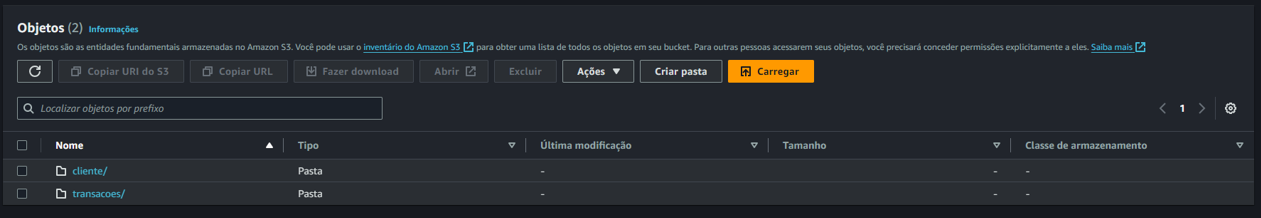

# Atividades

# **1. Criação da tabela**

No console do AWS Athena, execute a seguinte query:

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.cliente (
  `id_cliente` int,
  `nome` string,
  `valor_compra` double,
  `loja_cadastro` string
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) LOCATION 's3://modulo6-mari-ebac/cliente/'
TBLPROPERTIES ('has_encrypted_data'='false');
```
e

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.transacoes (
  `id_cliente` int,
  `id_transacao` int,
  `valor_compra` double,
  `id_loja` string
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) LOCATION 's3://modulo6-mari-ebac/transacoes/'
TBLPROPERTIES ('has_encrypted_data'='false');
```

Para cada uma das queries, no painel de resultados, você deve encontrar o seguinte resultado.

```
Query successful.
```


> **Atenção**: No campo LOCATION, substitua o **\<seu-nome>** pelo seu primeiro nome, exemplo: **modulo6-mari-ebac**.

> **Atenção**: Nesta atividade, você não precisa exportar os resultados.

# **2. Função UNION**

## 2.1. Query 1

No console do AWS Athena, execute a seguinte query:

```sql
SELECT id_cliente FROM transacoes
UNION
SELECT id_cliente  FROM cliente;
```

No painel de resultados você deve encontrar o seguinte resultado.

|id_cliente|
|-|
|3|
|1|
|4|
|5|
|6|
|2|

> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Voce deve envia-lo para os tutores de EBAC.

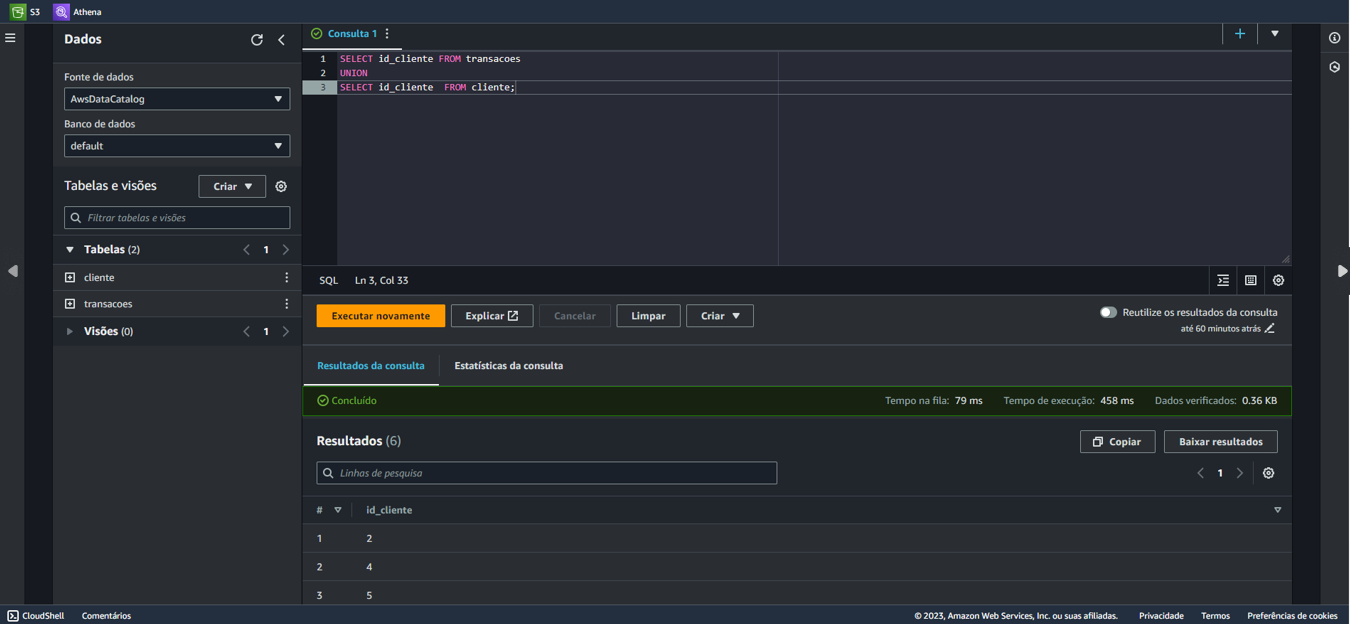

# **3.Junções inner/cross**

Vamos trabalhar agora a união inner e cruzamento de tabelas





## 3.1 Query 2

No console do AWS Athena, execute a seguinte query:

```sql
SELECT transacoes.id_cliente, cliente.nome
FROM transacoes
INNER JOIN cliente
ON transacoes.id_cliente = cliente.id_cliente;
```

No painel de resultados você deve encontrar o seguinte resultado.

|id_cliente|nome|
|-|-|
|1|maria|
|2|valentina
|1|maria|
|1|maria|
|4|joana|
|5|jose|

> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Voce deve envia-lo para os tutores de EBAC.

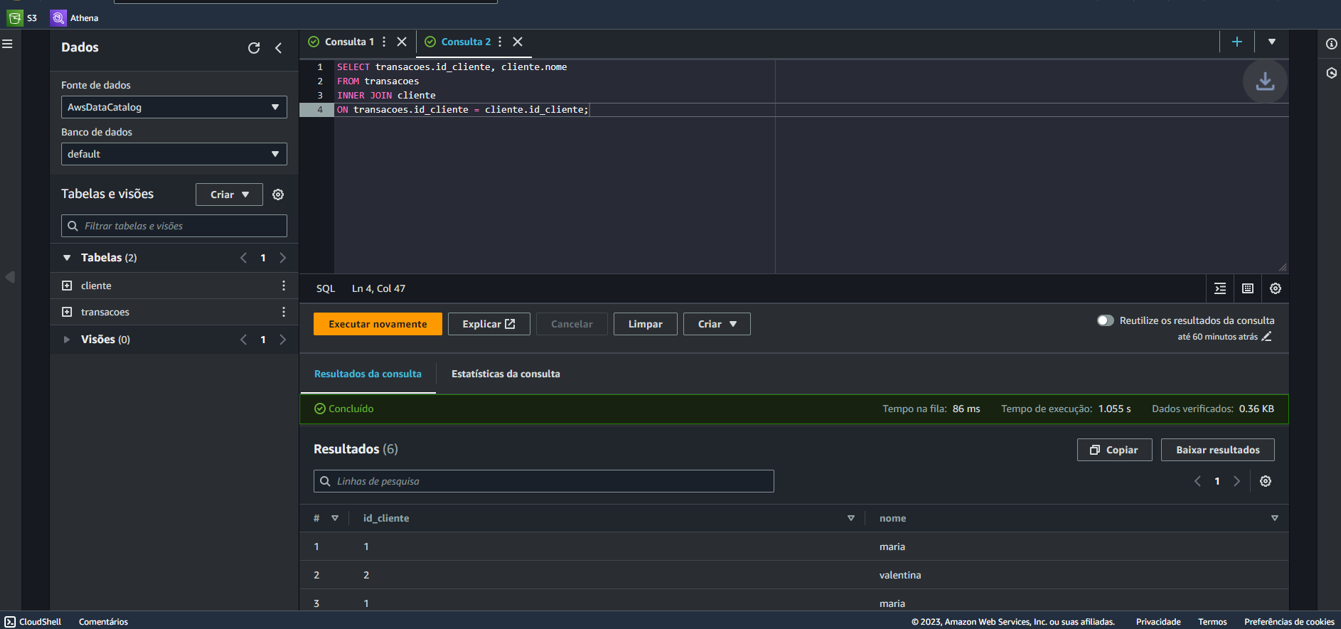

## 3.2. Query 3

No console do AWS Athena, execute a seguinte query:

```sql
SELECT *
FROM cliente
CROSS JOIN transacoes;
```

Parte do resultado pode ser visto [aqui](https://drive.google.com/file/d/1mZytFFn6lkOtzGRmy7lgvbTJ3PsamGNX/view?usp=sharing)

> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Voce deve envia-lo para os tutores de EBAC.

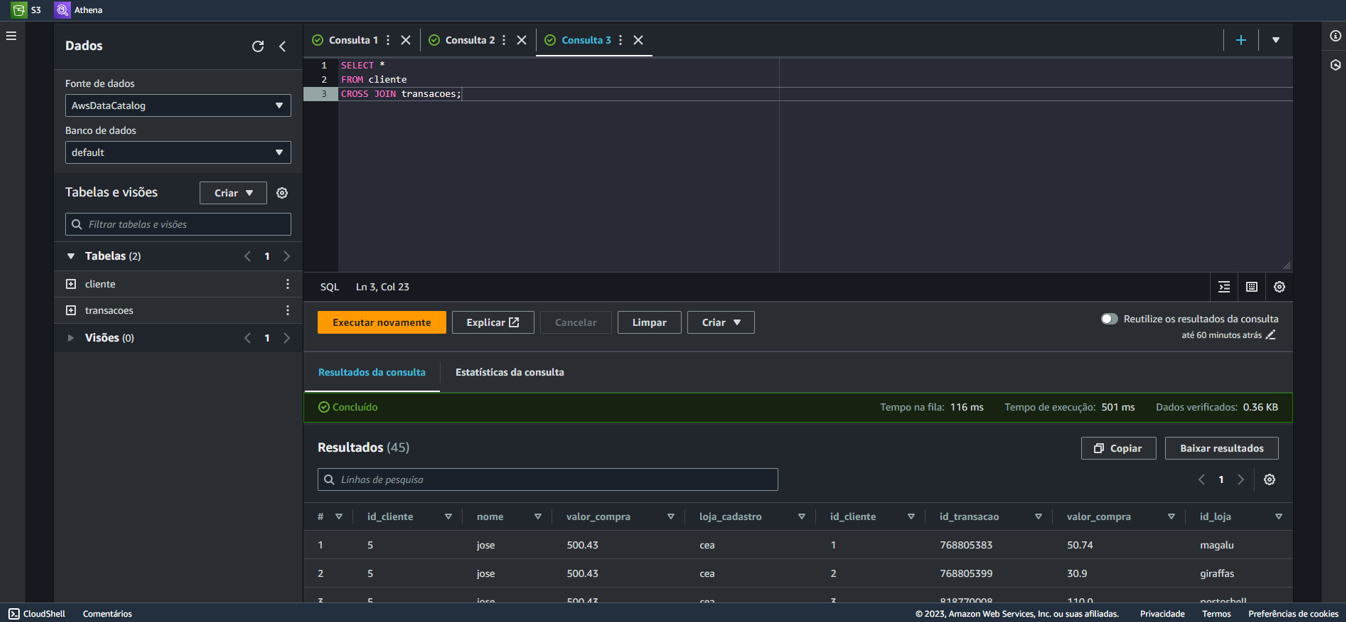

# **4. Junções: left / right**

## 4.1 Query 4

No console do AWS Athena, execute a seguinte query:

```sql
SELECT *
FROM transacoes
LEFT JOIN cliente
ON cliente.id_cliente = transacoes.id_cliente;
```

O resultado pode ser visto [aqui](https://drive.google.com/file/d/1rFJE53qHPft_bpb_5_JmlU2VI72lI4lL/view?usp=sharing)

> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Voce deve envia-lo para os tutores de EBAC.

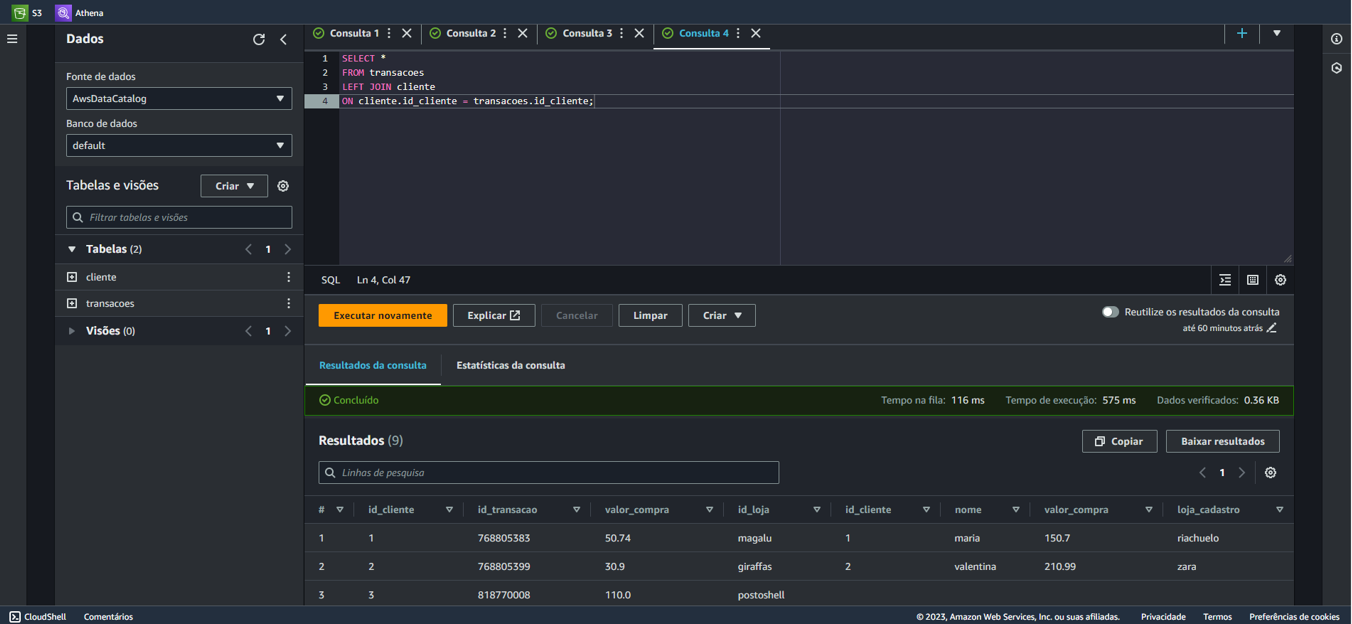

## 4.2 Query 5

No console do AWS Athena, execute a seguinte query:

```sql
SELECT *
FROM transacoes
RIGHT JOIN cliente
ON cliente.id_cliente = transacoes.id_cliente;
```

O resultado pode ser visto [aqui](https://drive.google.com/file/d/1Krr1tiDfn2wX6XzQUCYt5Z3jIfLYkCtl/view?usp=sharing)

> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Voce deve envia-lo para os tutores de EBAC.

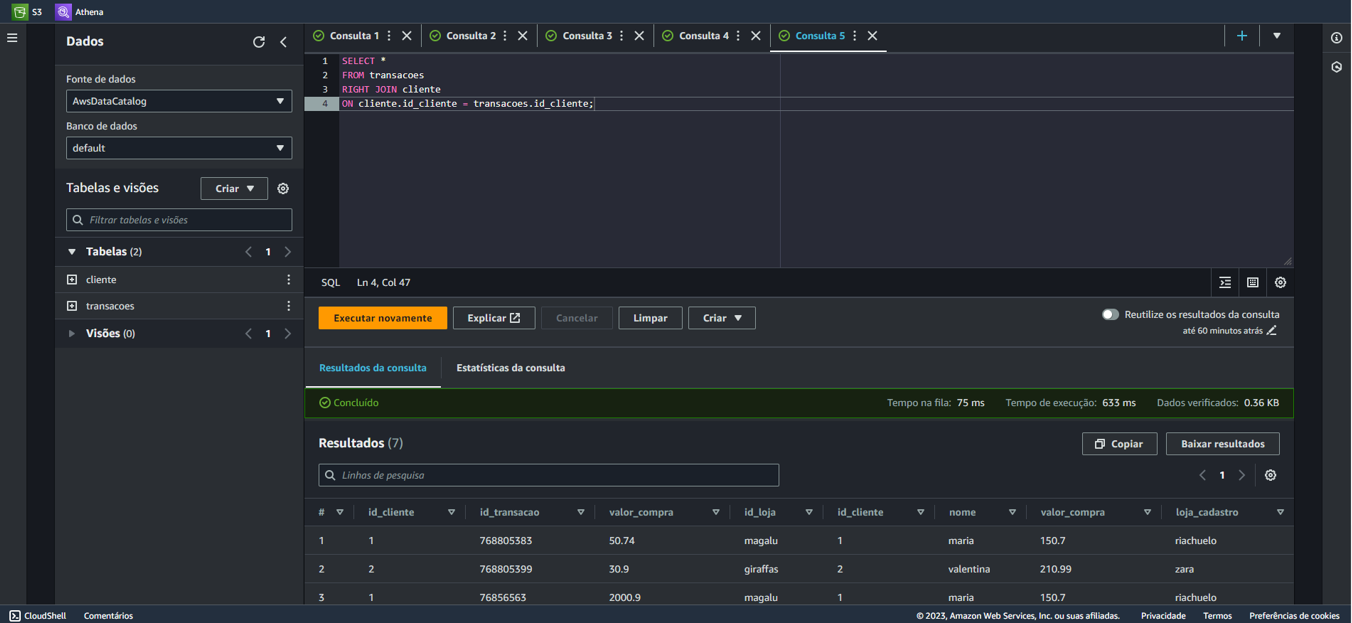